In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('/Users/alina/vs-project/MLPROJECT/MLweather_pipeline/data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#Encode sex and smoker columns 

encoder = LabelEncoder()

data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
# One hot encode the region column ( variable catgeorielle )

data = pd.get_dummies(data, columns=['region'])
data['region_northeast'] = data['region_northeast'].astype(int)
data['region_northwest'] = data['region_northwest'].astype(int)
data['region_southeast'] = data['region_southeast'].astype(int)
data['region_southwest'] = data['region_southwest'].astype(int)

data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


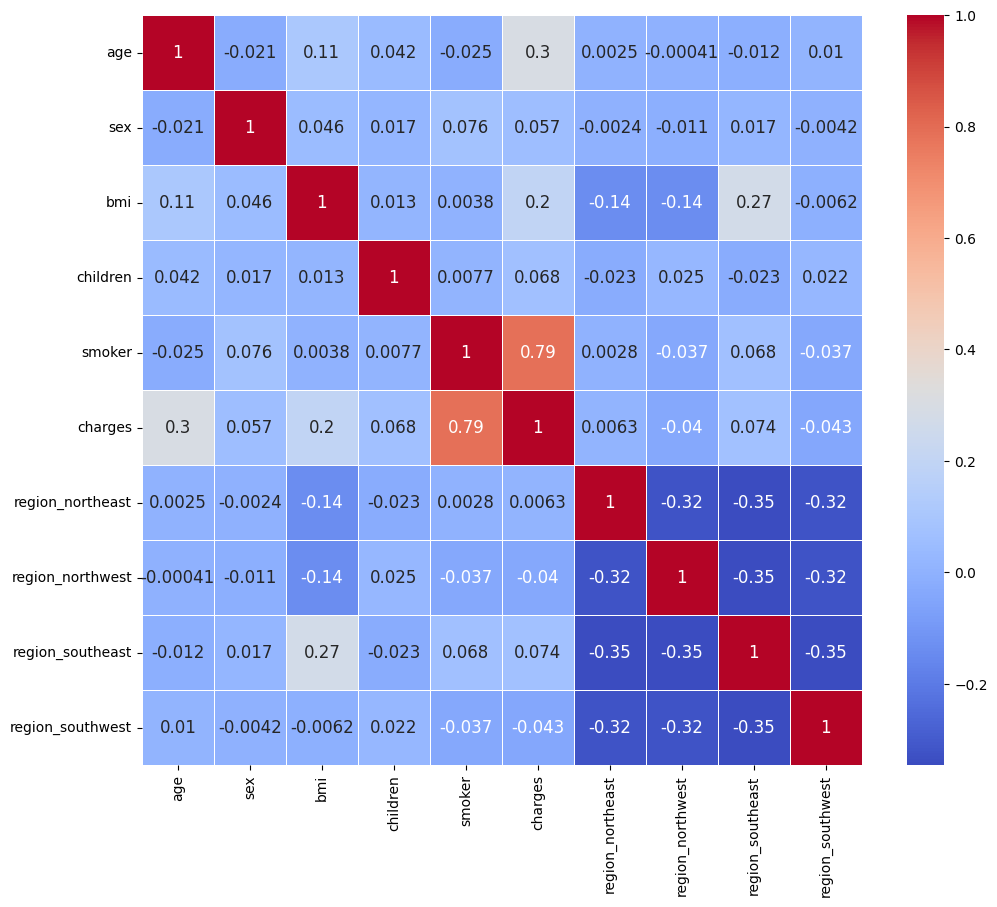

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créez une figure plus grande
plt.figure(figsize=(12, 10))

# Augmentez la taille de la police pour les annotations
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12})

# Ajustez les marges autour de la matrice
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9)

# Affichez le graphique
plt.show()


In [15]:
import pandas as pd

# Assuming that 'data' is your full dataset
df = pd.DataFrame(data)

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Filtering the correlation matrix to show only correlations with 'charges'
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)

print(correlation_with_charges)


charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64
